In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from gensim.models import Word2Vec
import logging
from sklearn.manifold import TSNE
import pandas as pd
import nltk
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

from utils.utils import compute_gap, preprocessing, extract_tfidf_keywords, jaccard, FM, F1

In [2]:
StopWords = set(stopwords.words('english'))
porter = PorterStemmer()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Raw = [line.strip('\n') for line in open('/home/hamish/Documents/datasets/1.Raw Input.txt').readlines()]

True_cluster= pd.read_excel('/home/hamish/Documents/datasets/5.True-Label-Ground-Truth.xlsx',header=None)

TF02= pd.read_excel('/home/hamish/Documents/datasets/4.TF-IDF Filtered Version.xlsx')

In [3]:
nltk.download('punkt')
Cleaned_Corpus = [preprocessing(line) for line in Raw]

tf_words_raw = extract_tfidf_keywords(Cleaned_Corpus, 10)


[nltk_data] Downloading package punkt to /home/hamish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
model = Word2Vec([word_tokenize(line) for line in Cleaned_Corpus], size=100, window=5, min_count=1, workers=15)
doc_vec = []
for f in tf_words_raw:
    doc_vec.append(np.mean(model[f], axis=0))
X = pd.DataFrame(doc_vec)
# CBOW_model = Word2Vec(tf_words_raw, min_count=1,size=100)

2020-05-27 14:06:08,448 : INFO : collecting all words and their counts
2020-05-27 14:06:08,449 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-27 14:06:08,518 : INFO : collected 44910 word types from a corpus of 528135 raw words and 4770 sentences
2020-05-27 14:06:08,518 : INFO : Loading a fresh vocabulary
2020-05-27 14:06:08,646 : INFO : effective_min_count=1 retains 44910 unique words (100% of original 44910, drops 0)
2020-05-27 14:06:08,647 : INFO : effective_min_count=1 leaves 528135 word corpus (100% of original 528135, drops 0)
2020-05-27 14:06:08,758 : INFO : deleting the raw counts dictionary of 44910 items
2020-05-27 14:06:08,759 : INFO : sample=0.001 downsamples 12 most-common words
2020-05-27 14:06:08,760 : INFO : downsampling leaves estimated 525098 word corpus (99.4% of prior 528135)
2020-05-27 14:06:08,841 : INFO : estimated required memory for 44910 words and 100 dimensions: 58383000 bytes
2020-05-27 14:06:08,841 : INFO : resetting laye

In [5]:
db = DBSCAN(eps=0.1, min_samples=5).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

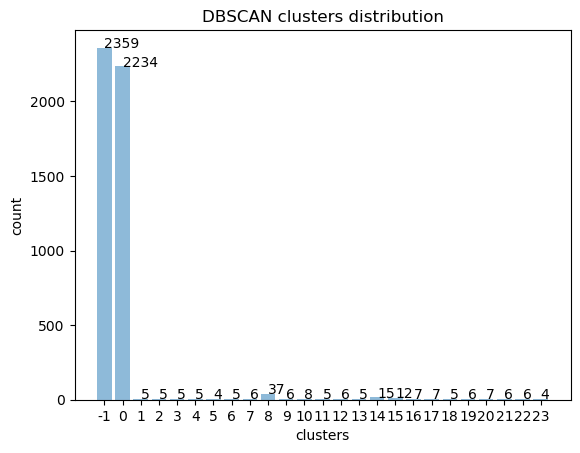

In [6]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

objects = unique
y_pos = unique
performance =counts

plt.bar(objects, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('count')
plt.xlabel('clusters')
plt.title('DBSCAN clusters distribution')

for i in range(len(counts)):
    plt.annotate(str(performance[i]), xy=(objects[i],performance[i]))

plt.show()

In [7]:
print(labels)

True_cluster.shape

[-1 -1 -1 ... -1  0  0]


(4770, 1)

In [8]:
#aoky formulas to our dbscan

True_cluster_arr=True_cluster.to_numpy()


True_arr = True_cluster.to_numpy()
True_arr = np.squeeze(True_arr)
#Labels from dbscan
print("This is jaccard with dbscan and tfdif at 10: {}".format(jaccard(labels,True_arr)))
print("This is FM with dbscan and tfdif at 10: {}".format(FM(labels,True_arr)))
print("This is F1 with dbscan and tfdif at 10: {}".format(F1(labels,True_arr)))
print("This is silhouette score with dbscan and tfdif at 10: {}".format(silhouette_score(labels.reshape(-1,1),True_arr)))

This is jaccard with dbscan and tfdif at 10: 0.10212183184403623
This is FM with dbscan and tfdif at 10: 0.24244162028519342
This is F1 with dbscan and tfdif at 10: 0.18531858982081703
This is silhouette score with dbscan and tfdif at 10: -0.3584794598586867


In [10]:
for lite in range(25,50):
    tf_words_raw1 = extract_tfidf_keywords(Cleaned_Corpus, lite)
    model = Word2Vec([word_tokenize(line) for line in Cleaned_Corpus], size=100, window=5, min_count=1, workers=12)
    doc_vec1 = []
    for f in tf_words_raw1:
        doc_vec1.append(np.mean(model[f], axis=0))
    X = pd.DataFrame(doc_vec1)
    # CBOW_model = Word2Vec(tf_words_raw, min_count=1,size=100, workers=16)
    db = DBSCAN(eps=0.1, min_samples=5).fit(X)

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print("This is jaccard with dbscan and tfdif at {val}: {stat}".format(val = lite, stat = jaccard(labels,True_arr)))
    print("This is FM with dbscan and tfdif at {val}: {stat}".format(val = lite, stat = FM(labels,True_arr)))
    print("This is F1 with dbscan and tfdif at {val}: {stat}".format(val = lite, stat = F1(labels,True_arr)))
    print("This is silhouette score with dbscan and tfdif at {val}: {stat}".format(val = lite,
    stat = silhouette_score(labels.reshape(-1,1),True_arr)))

2020-05-27 14:21:11,268 : INFO : collecting all words and their counts
2020-05-27 14:21:11,268 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-27 14:21:11,347 : INFO : collected 44910 word types from a corpus of 528135 raw words and 4770 sentences
2020-05-27 14:21:11,347 : INFO : Loading a fresh vocabulary
2020-05-27 14:21:11,487 : INFO : effective_min_count=1 retains 44910 unique words (100% of original 44910, drops 0)
2020-05-27 14:21:11,487 : INFO : effective_min_count=1 leaves 528135 word corpus (100% of original 528135, drops 0)
2020-05-27 14:21:11,599 : INFO : deleting the raw counts dictionary of 44910 items
2020-05-27 14:21:11,600 : INFO : sample=0.001 downsamples 12 most-common words
2020-05-27 14:21:11,600 : INFO : downsampling leaves estimated 525098 word corpus (99.4% of prior 528135)
2020-05-27 14:21:11,681 : INFO : estimated required memory for 44910 words and 100 dimensions: 58383000 bytes
2020-05-27 14:21:11,681 : INFO : resetting laye

This is jaccard with dbscan and tfdif at 25: 0.09935180052642532
This is FM with dbscan and tfdif at 25: 0.248769218497812
This is F1 with dbscan and tfdif at 25: 0.18074614600867647
This is silhouette score with dbscan and tfdif at 25: -0.3791989112164716
This is jaccard with dbscan and tfdif at 26: 0.09859953475586353
This is FM with dbscan and tfdif at 26: 0.2399792173432569
This is F1 with dbscan and tfdif at 26: 0.17950041236413744
This is silhouette score with dbscan and tfdif at 26: -0.38608246049648026
This is jaccard with dbscan and tfdif at 27: 0.09889361232566946
This is FM with dbscan and tfdif at 27: 0.24110688456821153
This is F1 with dbscan and tfdif at 27: 0.17998760064929964
This is silhouette score with dbscan and tfdif at 27: -0.45746057727612893
This is jaccard with dbscan and tfdif at 28: 0.09962020547596502
This is FM with dbscan and tfdif at 28: 0.24566579197925154
This is F1 with dbscan and tfdif at 28: 0.1811902054543367
This is silhouette score with dbscan and

In [13]:
print(1)

1


In [ ]:
#aoky formulas to our dbscan

True_cluster_arr=True_cluster.to_numpy()




In [ ]:
#aoky formulas to our dbscan

True_cluster_arr=True_cluster.to_numpy()


